# WeatherPy
----

#### Analysis
1) Lat vs Temp: although it 'seems' at first glance that the northern hemisphere is colder than the southern hemisphere, in fact, there are less cities plotted within the southern hemisphere, and therefore the data is not represented to the same degree for '-40 to -80' lat vs. '40 to 80' lat, where there is more representation of cities.  
2) Lat vs Humidity: a cluster seems to be formed around 40-60 lat, but this could be due to the sample of data produced. A way to mitigate this would have been to split the latitudes & longitudes into 4 quadrants, and then randomly assigning them together to ensure a fair representation around the globe.                                    
3) Lat vs Cloudiness: cloudiness looks to be rounded with most citings of 20%, 40%, 75%, 90% and 100%.                 
4) Lat & wind speed: do not look correlated, rare for windspeed to be over 20 mph. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint 

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

609

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

#Check URL
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=


In [5]:
# Set up lists to hold reponse info
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []

In [6]:
# Loop through cities, make weather API requests, append desired results (with print log of city name, number)
record_count = 1
set_count = 1

for i, city in enumerate (cities):
    time.sleep(1)
    if (i%50==0 and i>=50):
        set_count +=1
        record_count = 0
    print (f"Processing Record {record_count} of Set {set_count} | {city} \n")
    print (f"{query_url}{city}\n")
    record_count += 1
    
    response = requests.get(query_url + city).json()
    try:
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
    except:
        print(f"City Not Found, Skipped.")
        pass
    

Processing Record 1 of Set 1 | rikitea 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=rikitea

Processing Record 2 of Set 1 | beringovskiy 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=beringovskiy

Processing Record 3 of Set 1 | albany 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=albany

Processing Record 4 of Set 1 | la tuque 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=la tuque

Processing Record 5 of Set 1 | praia da vitoria 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=praia da vitoria

Processing Record 6 of Set 1 | beloha 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=beloha

Processing Record 7 of Set 1 | hilo 

http://api.openwea

Processing Record 2 of Set 2 | cidreira 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=cidreira

Processing Record 3 of Set 2 | cherskiy 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=cherskiy

Processing Record 4 of Set 2 | tashla 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=tashla

Processing Record 5 of Set 2 | pontes e lacerda 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=pontes e lacerda

Processing Record 6 of Set 2 | atuona 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=atuona

Processing Record 7 of Set 2 | faya 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=faya

Processing Record 8 of Set 2 | new norfolk 

http://api.openweathermap

Processing Record 4 of Set 3 | avarua 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=avarua

Processing Record 5 of Set 3 | nocera superiore 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=nocera superiore

Processing Record 6 of Set 3 | alegrete 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=alegrete

Processing Record 7 of Set 3 | challans 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=challans

Processing Record 8 of Set 3 | talnakh 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=talnakh

Processing Record 9 of Set 3 | lagoa 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=lagoa

Processing Record 10 of Set 3 | kattivakkam 

http://api.openweath

Processing Record 7 of Set 4 | ketchikan 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=ketchikan

Processing Record 8 of Set 4 | hermanus 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=hermanus

Processing Record 9 of Set 4 | summerside 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=summerside

Processing Record 10 of Set 4 | grindavik 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=grindavik

Processing Record 11 of Set 4 | kerrobert 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=kerrobert

Processing Record 12 of Set 4 | coos bay 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=coos bay

Processing Record 13 of Set 4 | port lincoln 

http://api

Processing Record 8 of Set 5 | eskasem 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=eskasem

City Not Found, Skipped.
Processing Record 9 of Set 5 | umzimvubu 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=umzimvubu

City Not Found, Skipped.
Processing Record 10 of Set 5 | port macquarie 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=port macquarie

Processing Record 11 of Set 5 | zhicheng 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=zhicheng

Processing Record 12 of Set 5 | alanya 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=alanya

Processing Record 13 of Set 5 | korla 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=korla

Processing Rec

Processing Record 9 of Set 6 | hay river 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=hay river

Processing Record 10 of Set 6 | olinda 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=olinda

Processing Record 11 of Set 6 | los llanos de aridane 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=los llanos de aridane

Processing Record 12 of Set 6 | kurilsk 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=kurilsk

Processing Record 13 of Set 6 | beidao 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=beidao

Processing Record 14 of Set 6 | novikovo 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=novikovo

Processing Record 15 of Set 6 | corrales 

http

Processing Record 12 of Set 7 | fort saint john 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=fort saint john

City Not Found, Skipped.
Processing Record 13 of Set 7 | bur gabo 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=bur gabo

City Not Found, Skipped.
Processing Record 14 of Set 7 | warqla 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=warqla

City Not Found, Skipped.
Processing Record 15 of Set 7 | sitka 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=sitka

Processing Record 16 of Set 7 | boende 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=boende

Processing Record 17 of Set 7 | ofaqim 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=o

Processing Record 14 of Set 8 | muyezerskiy 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=muyezerskiy

Processing Record 15 of Set 8 | mahina 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=mahina

Processing Record 16 of Set 8 | meulaboh 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=meulaboh

Processing Record 17 of Set 8 | tura 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=tura

Processing Record 18 of Set 8 | ibb 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=ibb

Processing Record 19 of Set 8 | arlit 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=arlit

Processing Record 20 of Set 8 | salta 

http://api.openweathermap.org/data/2.5/weather

Processing Record 17 of Set 9 | fort nelson 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=fort nelson

Processing Record 18 of Set 9 | tessaoua 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=tessaoua

Processing Record 19 of Set 9 | nieuw amsterdam 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=nieuw amsterdam

Processing Record 20 of Set 9 | ilembo 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=ilembo

Processing Record 21 of Set 9 | namibe 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=namibe

Processing Record 22 of Set 9 | kudahuvadhoo 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=kudahuvadhoo

Processing Record 23 of Set 9 | juruti 

htt

Processing Record 19 of Set 10 | burnie 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=burnie

Processing Record 20 of Set 10 | bundi 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=bundi

Processing Record 21 of Set 10 | kodinsk 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=kodinsk

Processing Record 22 of Set 10 | hovd 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=hovd

Processing Record 23 of Set 10 | palma di montechiaro 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=palma di montechiaro

Processing Record 24 of Set 10 | port-de-paix 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=port-de-paix

City Not Found, Skipped.
Processing Record 25 

Processing Record 21 of Set 11 | poum 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=poum

Processing Record 22 of Set 11 | warwick 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=warwick

Processing Record 23 of Set 11 | tukrah 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=tukrah

Processing Record 24 of Set 11 | chingola 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=chingola

Processing Record 25 of Set 11 | baft 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=baft

Processing Record 26 of Set 11 | nanortalik 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=nanortalik

Processing Record 27 of Set 11 | lypnyazhka 

http://api.openweathermap.org/

Processing Record 24 of Set 12 | port-gentil 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=port-gentil

Processing Record 25 of Set 12 | wagar 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=wagar

Processing Record 26 of Set 12 | baculin 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=baculin

Processing Record 27 of Set 12 | rapina 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=rapina

Processing Record 28 of Set 12 | anaconda 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=anaconda

Processing Record 29 of Set 12 | selikhino 

http://api.openweathermap.org/data/2.5/weather?appid=401db67f0e7558c6fcb2a9eae14075b9&units=imperial&q=selikhino

Processing Record 30 of Set 12 | pokosnoye 

http://api.openwe

In [7]:
#Check that data was captured properly
print(f"City:       {city_name}")
print(f"Cloudiness: {cloudiness}")
print(f"Country:    {country}")
print(f"Date:       {date}")
print(f"Humidity:   {humidity}")
print(f"Lat:        {lat}")
print(f"Lng:        {lng}")
print(f"Max Temp:   {max_temp}")
print(f"Wind Speed: {wind_speed}")

City:       ['Rikitea', 'Beringovskiy', 'Albany', 'La Tuque', 'Praia da Vitoria', 'Beloha', 'Hilo', 'Ushuaia', 'Republic of El Salvador', 'Vulturu', 'Glendive', 'Pangnirtung', 'Klaksvik', 'Ancud', 'Hithadhoo', 'Magnolia', 'Cape Town', 'Emerald', 'Bethel', 'Sept-Iles', 'Praxedis Guerrero', 'Sabang', 'Hornepayne', 'Mount Isa', 'Airai', 'Sao Filipe', 'Hobart', 'Edeia', 'Barrow', 'Kumul', 'Busselton', 'Tromso', 'Shenkursk', 'Boa Vista', 'Saint-Augustin', 'Katsuura', 'Nikolskoye', 'Torbay', 'Narsaq', 'Ucluelet', 'Sinegorye', 'Isangel', 'Tessalit', 'Nantucket', 'Dikson', 'Bluff', 'Kapaa', 'San Patricio', 'Kassala', 'Cidreira', 'Cherskiy', 'Tashla', 'Pontes e Lacerda', 'Atuona', 'Faya', 'New Norfolk', "Ust'-Kan", 'Steamboat Springs', 'George Town', 'Bambous Virieux', 'Butaritari', 'Punta Arenas', 'Kabalo', 'Huarmey', 'Mataura', 'Quatre Cocos', 'Kommunisticheskiy', 'Hasaki', 'Bariloche', 'Bourail', 'Saint-Philippe', 'Hualmay', 'Karla', 'College', 'Lavrentiya', 'Toyooka', 'Vila Praia de Ancora'

In [8]:
#Check that lengths are equal
print(len(city_name))
print(len(cloudiness))
print(len(country))
print(len(date))
print(len(humidity))
print(len(lat))
print(len(lng))
print(len(max_temp))
print(len(wind_speed))

566
566
566
566
566
566
566
566
566


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
# Build a dataframe from the lists
weather_data = {"City": city_name, 
                "Cloudiness (%)": cloudiness, 
                "Country": country, 
                "Date": date, 
                "Humidity (%)": humidity, 
                "Lat": lat, 
                "Lng": lng, 
                "Max Temp (F)": max_temp, 
                "Wind Speed (mph)": wind_speed
}

weather_data = pd.DataFrame(weather_data)
weather_data.head()

,City,Cloudiness (%),Country,Date,Humidity (%),Lat,Lng,Max Temp (F),Wind Speed (mph)
0,Rikitea,0,PF,1582038691,81,-23.12,-134.97,78.44,15.12
1,Beringovskiy,42,RU,1582038692,84,63.05,179.32,-9.54,18.63
2,Albany,90,US,1582038663,85,42.60,-73.97,34.00,3.36
3,La Tuque,100,CA,1582038694,85,47.43,-72.78,12.42,9.91
4,Praia da Vitoria,75,PT,1582038695,62,38.73,-27.07,57.20,8.93


In [10]:
weather_data.to_csv(output_data_file, index = False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

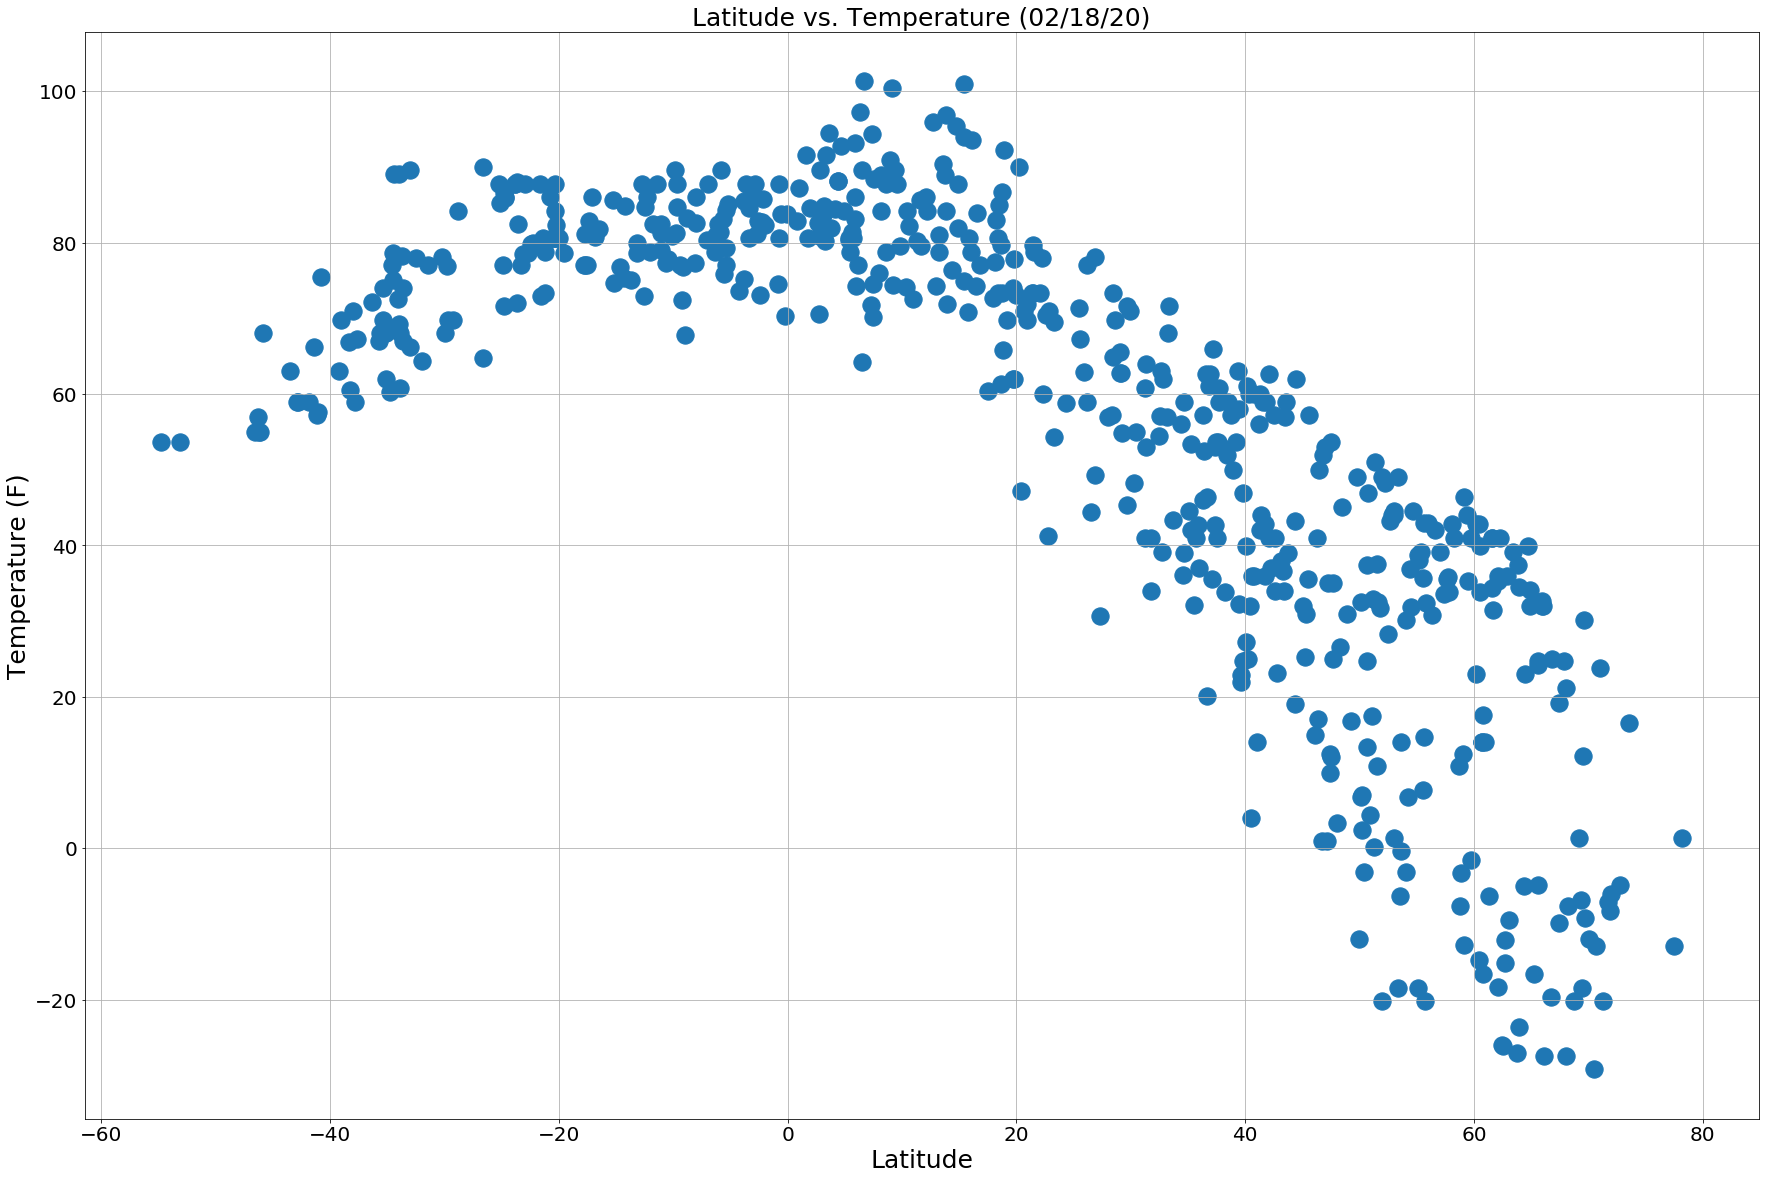

In [76]:
# Build a scatter plot for each data type
plt.figure(figsize=(30,20))
plt.scatter(weather_data["Lat"], weather_data["Max Temp (F)"],s=300, marker="o")


# Incorporate the other graph properties
plt.title("Latitude vs. Temperature (%s)" % time.strftime("%x"), fontsize=25)
plt.ylabel("Temperature (F)", fontsize=25)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel("Latitude", fontsize=25)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Latitude_vs_Temperature.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

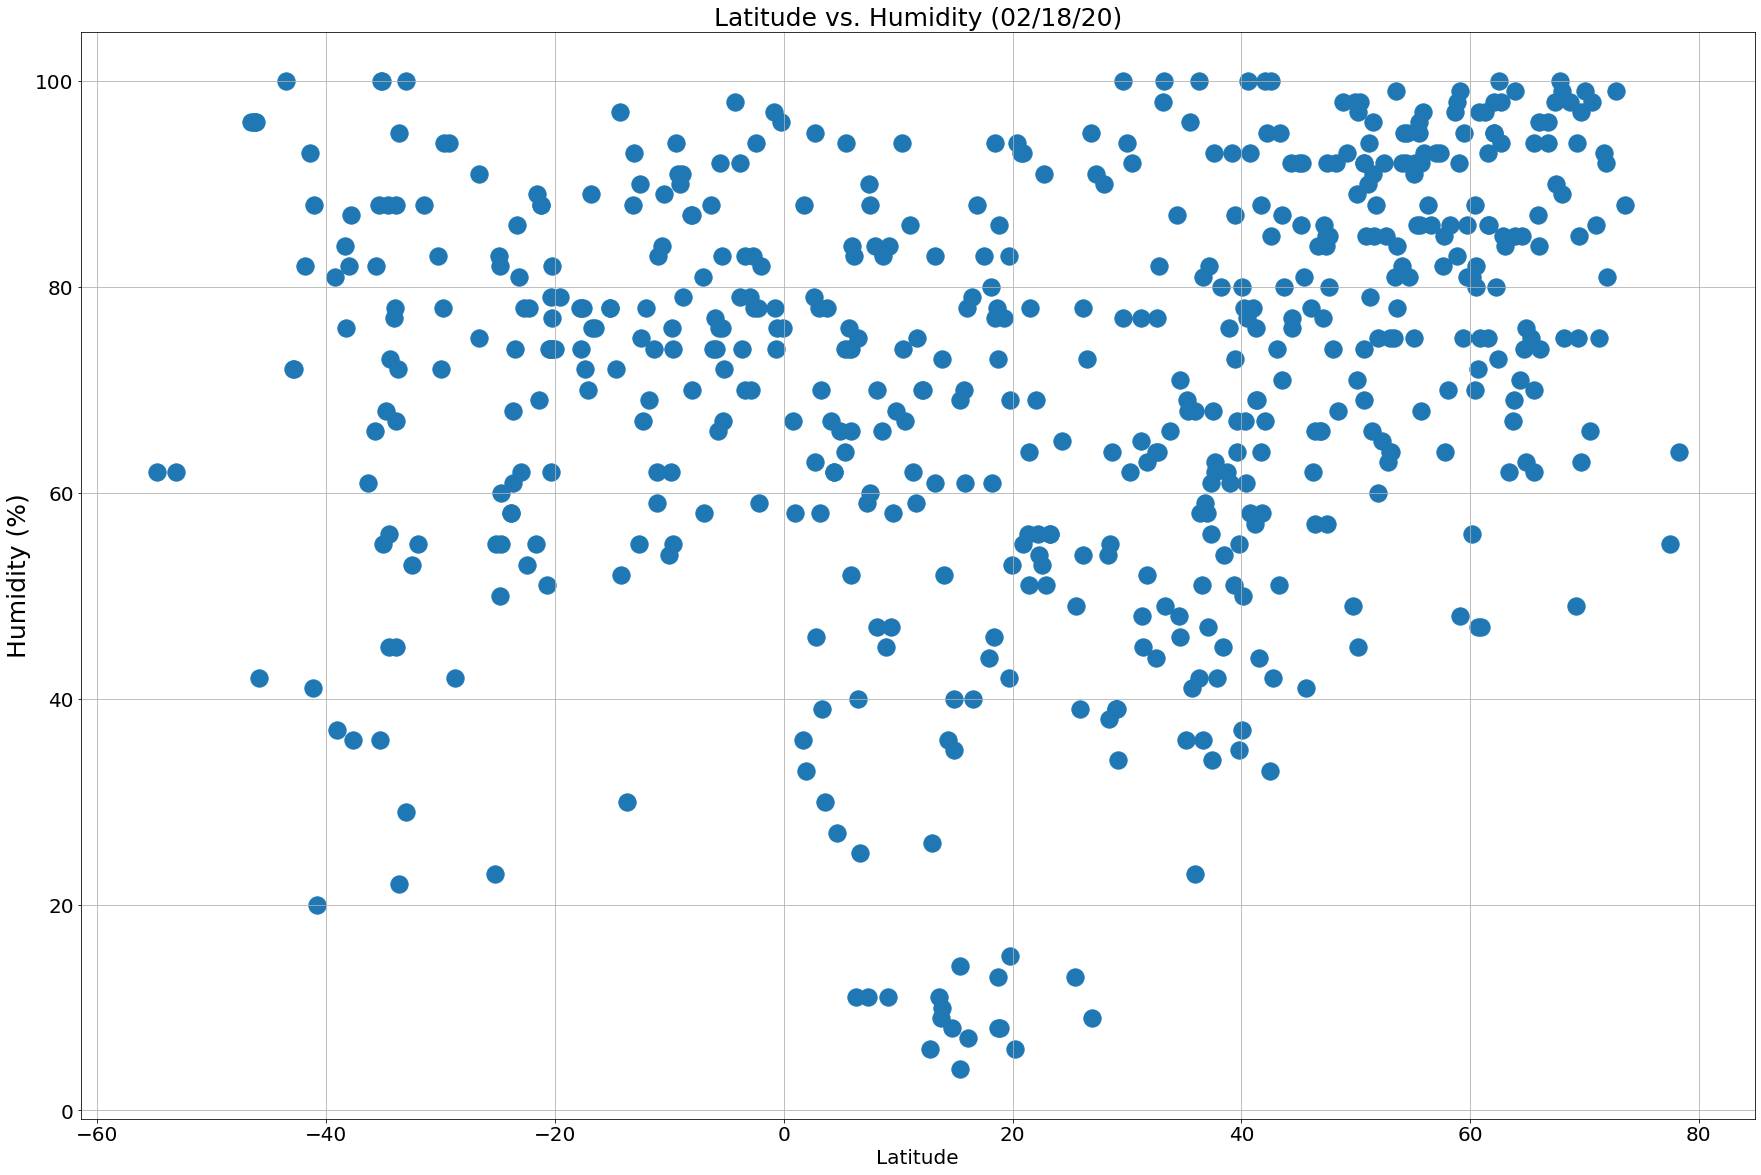

In [77]:
# Build a scatter plot for each data type
plt.figure(figsize=(30,20))
plt.scatter(weather_data["Lat"], weather_data["Humidity (%)"], s=300, marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity (%s)" % time.strftime("%x"), fontsize=25)
plt.ylabel("Humidity (%)", fontsize=25)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.xlabel("Latitude", fontsize=20)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Latitude_vs_Humidity.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

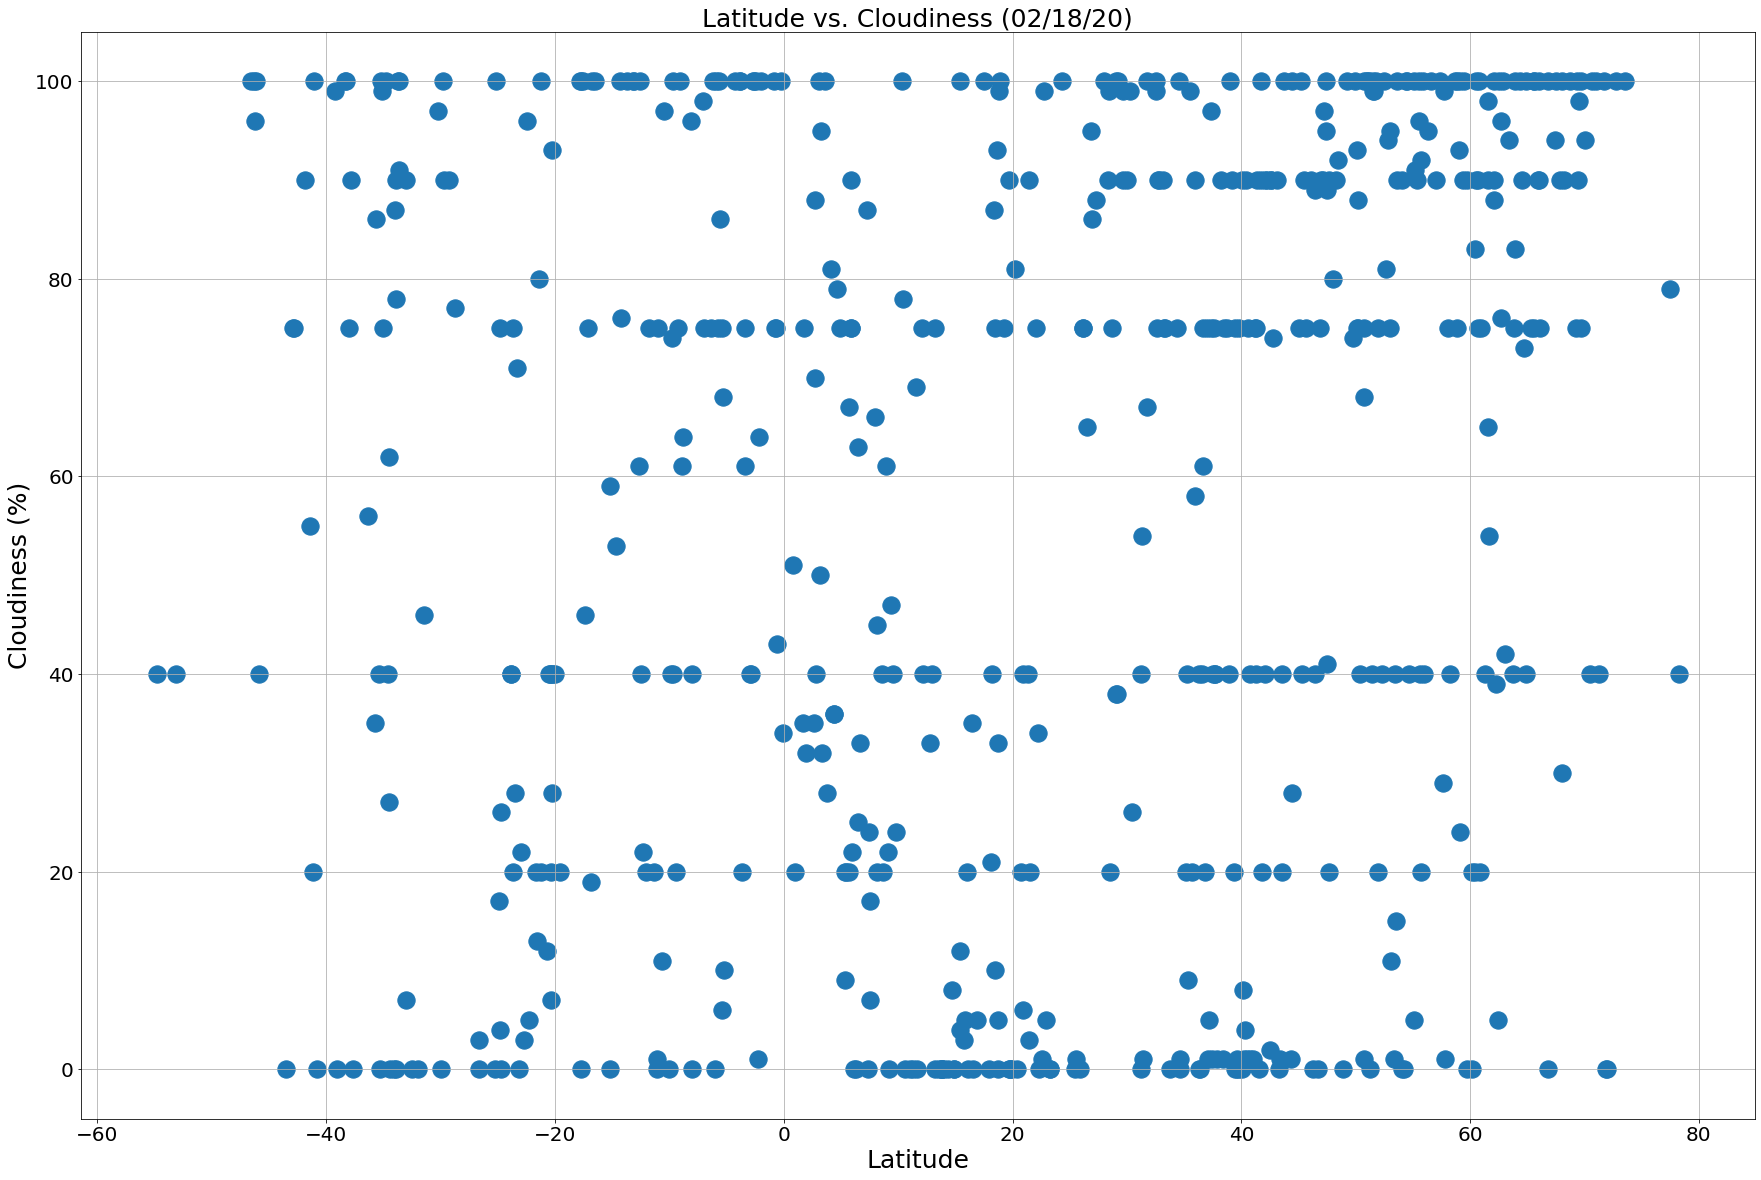

In [78]:
# Build a scatter plot for each data type
plt.figure(figsize=(30,20))
plt.scatter(weather_data["Lat"], weather_data["Cloudiness (%)"], s=300, marker="o")

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness (%s)" % time.strftime("%x"), fontsize=25)
plt.ylabel("Cloudiness (%)", fontsize=25)
plt.xlabel("Latitude", fontsize=25)
plt.tick_params(axis='x', labelsize=20)
plt.tick_params(axis='y', labelsize=20)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Latitude_vs_Cloudiness.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

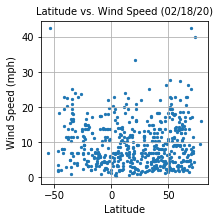

In [72]:
# Build a scatter plot for each data type
plt.figure(figsize=(30,20))
plt.scatter(weather_data["Lat"], weather_data["Wind Speed (mph)"], s=300, marker="o", )

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed (%s)" % time.strftime("%x"), fontsize=25)
plt.ylabel("Wind Speed (mph)", fontsize=10)
plt.xlabel("Latitude", fontsize=10)
plt.tick_params(axis='x', labelsize=10)
plt.tick_params(axis='y', labelsize=10)
plt.grid(True)

# Save the figure
plt.savefig("output_data/Latitude_vs_WindSpeed.png")

# Show plot
plt.show()